In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error

Insruance Predict Model

In [5]:
train_df = pd.read_csv("raw_data/train.csv")
test_df = pd.read_csv("raw_data/test.csv")
train_df.head()
print(f"Columns Informaiton {train_df.columns}")

Columns Informaiton Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')


In [6]:
print(train_df.dtypes)
non_object_columns = train_df.select_dtypes(exclude=['object'])
print(non_object_columns.columns)
columns_list = non_object_columns.columns
print(columns_list)

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object
Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')
Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicl

In [7]:
# Inital Training regarding all of informaiton
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Initally how many data is populates how should pdisplay on this.
def inital_check(train_df):

    non_object_columns_df = train_df.select_dtypes(exclude=['object'])
    # X = non_object_columns_df.drop(columns=["Premium Amount"], errors='ignore')

    X = non_object_columns_df.drop(columns = ["Premium Amount"], errors = 'ignore')
    y = train_df["Premium Amount"]

   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
   
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R² Score: {r2_score(y_test, y_pred)}')

# inital_check(train_df)

In [8]:
train_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [9]:
# How many percentage has null value for it.
train_df.isnull().sum() / train_df.shape[0]


id                      0.000000e+00
Age                     1.558750e-02
Gender                  0.000000e+00
Annual Income           3.745750e-02
Marital Status          1.544083e-02
Number of Dependents    9.139333e-02
Education Level         0.000000e+00
Occupation              2.983958e-01
Health Score            6.173000e-02
Location                0.000000e+00
Policy Type             0.000000e+00
Previous Claims         3.033575e-01
Vehicle Age             5.000000e-06
Credit Score            1.149017e-01
Insurance Duration      8.333333e-07
Policy Start Date       0.000000e+00
Customer Feedback       6.485333e-02
Smoking Status          0.000000e+00
Exercise Frequency      0.000000e+00
Property Type           0.000000e+00
Premium Amount          0.000000e+00
dtype: float64

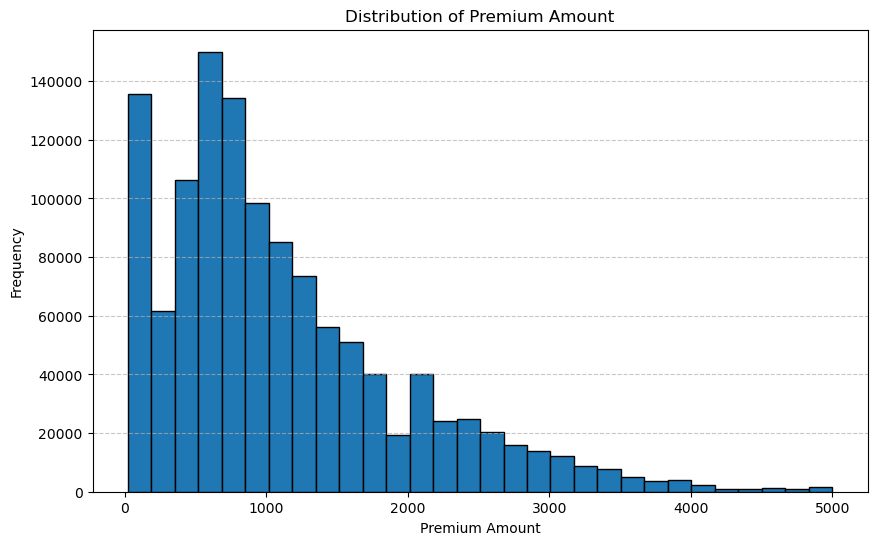

In [10]:
# Target value checking on distribution how data has been distributed.
import matplotlib.pyplot as plt

# Plot histogram for Premium Amount
plt.figure(figsize=(10, 6))
plt.hist(train_df['Premium Amount'], bins=30, edgecolor='black')
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
def populate_each_object_unique_values(train_df):
    object_columns_df = train_df.select_dtypes(exclude=['float64', 'int64'])
    unique_values_dict = {}
    for column in object_columns_df.columns:
        unique_values_dict[column] = object_columns_df[column].unique().tolist()
    
    return unique_values_dict
train_df = pd.read_csv("raw_data/train.csv")

train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date']).dt.date
unique_values = populate_each_object_unique_values(train_df)
# Print the results
for col, values in unique_values.items():
    print(f"Column: {col}: {values}")

Column: Gender: ['Female', 'Male']
Column: Marital Status: ['Married', 'Divorced', 'Single', nan]
Column: Education Level: ["Bachelor's", "Master's", 'High School', 'PhD']
Column: Occupation: ['Self-Employed', nan, 'Employed', 'Unemployed']
Column: Location: ['Urban', 'Rural', 'Suburban']
Column: Policy Type: ['Premium', 'Comprehensive', 'Basic']
Column: Policy Start Date: [datetime.date(2023, 12, 23), datetime.date(2023, 6, 12), datetime.date(2023, 9, 30), datetime.date(2024, 6, 12), datetime.date(2021, 12, 1), datetime.date(2022, 5, 20), datetime.date(2020, 2, 21), datetime.date(2022, 8, 8), datetime.date(2020, 12, 14), datetime.date(2020, 8, 2), datetime.date(2021, 5, 12), datetime.date(2020, 3, 22), datetime.date(2021, 10, 28), datetime.date(2023, 1, 20), datetime.date(2021, 8, 14), datetime.date(2020, 10, 17), datetime.date(2024, 4, 22), datetime.date(2020, 12, 27), datetime.date(2021, 10, 13), datetime.date(2020, 6, 25), datetime.date(2024, 6, 25), datetime.date(2023, 7, 31), dat

In [12]:
train_df = pd.read_csv("raw_data/train.csv")

mapping_dict = {
    'Gender': {'Female': 0, 'Male': 1},
    'Marital Status': {'Married': 0, 'Divorced': 1, 'Single': 2},
    'Education Level': {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3},
    'Occupation': {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2},
    'Location': {'Urban': 0, 'Suburban': 1, 'Rural': 2},
    'Smoking Status': {'No': 0, 'Yes': 1},
    'Exercise Frequency': {'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3},
    'Property Type': {'House': 0, 'Apartment': 1, 'Condo': 2}
}

# 매핑 적용 함수
def apply_mapping(df, mapping):
    for column, mapping_values in mapping.items():
        if column in df.columns:
            df[column] = df[column].map(mapping_values)
    return df

# 매핑 적용
train_df = apply_mapping(train_df, mapping_dict)

# 결과 확인
print(train_df.head())

def preapre_clean_data(train_df):
    print(f"Original Shape {train_df.shape}")
    target_df = apply_mapping(train_df, mapping_dict)

    target_df = target_df.dropna()
    
    return target_df

target_df = preapre_clean_data(train_df)
target_df.head()

   id   Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0   0  19.0       0        10049.0             0.0                   1.0   
1   1  39.0       0        31678.0             1.0                   3.0   
2   2  23.0       1        25602.0             1.0                   3.0   
3   3  21.0       1       141855.0             0.0                   2.0   
4   4  21.0       1        39651.0             2.0                   1.0   

   Education Level  Occupation  Health Score  Location  ... Previous Claims  \
0                1         1.0     22.598761         0  ...             2.0   
1                2         NaN     15.569731         2  ...             1.0   
2                0         1.0     47.177549         1  ...             1.0   
3                1         NaN     10.938144         2  ...             1.0   
4                1         1.0     20.376094         2  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy St

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


In [13]:
train_df = pd.read_csv("raw_data/train.csv")
# How many data has been changed.
# What I need I need data informaiton

correation_thersohold = 1 / len(train_df.columns)
missing_value_threshold = 0.3


import pandas as pd
from sklearn.preprocessing import LabelEncoder


def encode_categorical_columns(df):
   label_encoders = {}  # 각 컬럼에 대한 LabelEncoder를 저장
   for column in df.select_dtypes(include=['object']).columns:
       le = LabelEncoder()
       df[column] = le.fit_transform(df[column])
       label_encoders[column] = le 
   return df, label_encoders

target_df = encode_categorical_columns(train_df)

target_df = train_df.drop(columns=["id"])
correlation_matrix = target_df.corr()

if 'Premium Amount' in target_df.columns:
    premium_correlation = correlation_matrix['Premium Amount']
    
    # Sort the correlations in ascending order
    sorted_correlation = premium_correlation.abs().sort_values(ascending=True)
    print(sorted_correlation)

# As a result, when we create model, we can ignore Insurance Duration, Vehicle Age????

missing_values = target_df.isna().sum().sort_values(ascending=False)
print("Number of missing values in each column:")
print(missing_values)

Insurance Duration      0.000028
Gender                  0.000161
Smoking Status          0.000163
Vehicle Age             0.000391
Policy Type             0.000884
Number of Dependents    0.000976
Location                0.001059
Exercise Frequency      0.001098
Education Level         0.001121
Property Type           0.001222
Age                     0.002430
Marital Status          0.005356
Occupation              0.006059
Policy Start Date       0.010087
Annual Income           0.012390
Health Score            0.014704
Customer Feedback       0.015772
Credit Score            0.026014
Previous Claims         0.046874
Premium Amount          1.000000
Name: Premium Amount, dtype: float64
Number of missing values in each column:
Previous Claims         364029
Credit Score            137882
Number of Dependents    109672
Health Score             74076
Annual Income            44949
Age                      18705
Vehicle Age                  6
Insurance Duration           1
Occupation    

In [14]:
train_df = pd.read_csv("raw_data/train.csv")
print(missing_values.keys())
print(premium_correlation.keys())
columns_to_drop = [] 
train_df = train_df.drop(columns=["id"])
for col in train_df.columns:
    print(col)
    if premium_correlation.abs()[col] < correation_thersohold and (missing_values[col] / len(train_df)) > missing_value_threshold:
        columns_to_drop.append(col)
        
print(columns_to_drop)

Index(['Previous Claims', 'Credit Score', 'Number of Dependents',
       'Health Score', 'Annual Income', 'Age', 'Vehicle Age',
       'Insurance Duration', 'Occupation', 'Education Level', 'Location',
       'Policy Type', 'Gender', 'Marital Status', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
Age
Gender
Annual Income
Marital Status
Number of Dependents
Education Level
Occupation
Health Score
Location
Policy Type
Previous Claims
Vehicle Age
Credit Score
Insurance Duration
Policy

In [ ]:
target_df = train_df.drop(columns=['Previous Claims'])
target_df.shape

duplicate_rows = target_df[target_df.duplicated()]

# Print duplicate rows
# Duplicate Data not exists
print("Duplicate rows in the DataFrame:")

print(target_df.isna().sum())
correlation_matrix = target_df.corr()
premium_correlation = correlation_matrix['Premium Amount']
print(premium_correlation)




Duplicate rows in the DataFrame:
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64
Age                    -0.002430
Annual Income          -0.012390
Number of Dependents   -0.000976
Health Score            0.014704
Vehicle Age             0.000391
Credit Score           -0.026014
Insurance Duration     -0.000028
Premium Amount          1.000000
Name: Premium Amount, dtype: float64


C:\Users\ykim\AppData\Local\Temp\ipykernel_23204\659939243.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = target_df.corr()


In [60]:
target_df, label = encode_categorical_columns(train_df)

target_df.head()
target_df = target_df.dropna(subset=['Insurance Duration'])
target_df['Previous Claims'] = target_df["Previous Claims"].fillna(0)
target_df["Number of Dependents"] = target_df["Number of Dependents"].fillna(2)

target_df["Age"] = target_df["Number of Dependents"].fillna(2)
target_df["Annual Income"] = target_df["Annual Income"].fillna(32745)
target_df["Health Score"] = target_df["Health Score"].fillna(25)

credit_score_mean = target_df["Credit Score"].dropna().mean()
target_df["Credit Score"] = target_df["Credit Score"].fillna(credit_score_mean)


C:\Users\ykim\AppData\Local\Temp\ipykernel_23204\3035694670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['Previous Claims'] = target_df["Previous Claims"].fillna(0)
C:\Users\ykim\AppData\Local\Temp\ipykernel_23204\3035694670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["Number of Dependents"] = target_df["Number of Dependents"].fillna(2)
C:\Users\ykim\AppData\Local\Temp\ipykernel_23204\3035694670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [62]:
# Convert age variiences
target_df["Age Variance"] = target_df["Age"] / 10


C:\Users\ykim\AppData\Local\Temp\ipykernel_23204\462073808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["Age Variance"] = target_df["Age"] / 10


In [65]:
correlation_matrix = target_df.corr()
premium_correlation = correlation_matrix['Premium Amount']
premium_correlation


Age                    -0.000947
Gender                  0.000161
Annual Income          -0.012091
Marital Status          0.005356
Number of Dependents   -0.000947
Education Level        -0.001121
Occupation             -0.006059
Health Score            0.014119
Location                0.001059
Policy Type            -0.000884
Previous Claims         0.043885
Vehicle Age             0.000391
Credit Score           -0.024438
Insurance Duration     -0.000028
Policy Start Date      -0.010087
Customer Feedback       0.015772
Smoking Status          0.000163
Exercise Frequency     -0.001098
Property Type          -0.001222
Premium Amount          1.000000
Age Variance           -0.000947
Name: Premium Amount, dtype: float64